##Import Statements


To run the code effectively, we first need to import the essential libraries. Below are the key libraries used and their significance:

`sklearn.metrics`: Provides a wide range of metrics to evaluate the performance of machine learning models, including accuracy, precision, recall, and more.
`sklearn.model_selection`: Contains utilities for splitting datasets into training and testing sets, performing cross-validation, and optimizing model hyperparameters.



1. **TensorFlow**:
   - For building the neural network using the `Sequential` model and `Dense` layers.

2. **Numpy**:
   - A fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices.

3. **Matplotlib** and **Seaborn**:
   - For visualizing results like accuracy/loss graphs and confusion matrices.

4. **Sklearn.metrics**:
  - Provides a wide range of metrics to evaluate the performance of machine learning models, including accuracy, precision, recall, and more.

5. **Sklearn.model_selection**
  - Contains utilities for splitting datasets into training and testing sets, performing cross-validation, and optimizing model hyperparameters.





In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report,roc_curve, auc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/PhiUSIIL_Phishing_URL_Dataset.csv')
#df = pd.read_csv('/content/drive/MyDrive/MLProject_2024/PhiUSIIL_Phishing_URL_Dataset.csv');
df.head()  # Display the first few rows

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


#Data Preprocessing
In this section we do the following to preprocess the data:


1. Identify Features with Low Variance  
2. Drop Categorical Features & Features with Low Variance
3.   Convert TLD categroical features to numerical features
4. Plot the correlation graph of the features with label.




### Identifying Low-Variance Features
The following code iterates through the columns of our dataframe to identify features with low variance, which may not contribute much to the model's performance specifically those that have only two unique values binary features.

**Ouptut**

We notice that IsDomainIP, HasObfuscation and Crypto columns have minimal varince with
99% of the values being 0s. There are very few occurences of 1 compared to 0. We drop theese columns from our dataframe then plot the correlation graph.

In [ ]:
#find and count values for all columns with exactly 2 unique values
for col in df.columns:
    if df[col].nunique() == 2:
        print(f"Column: {col}")
        print(df[col].value_counts())
        print()
#we notice that IsDomainIP and HasObfuscation Crypto columns have minimal varince
#99% of the values are 0s. There are very few occurences of 1 compared to 0


Column: IsDomainIP
IsDomainIP
0    235157
1       638
Name: count, dtype: int64

Column: HasObfuscation
HasObfuscation
0    235310
1       485
Name: count, dtype: int64

Column: IsHTTPS
IsHTTPS
1    184539
0     51256
Name: count, dtype: int64

Column: HasTitle
HasTitle
1    203081
0     32714
Name: count, dtype: int64

Column: HasFavicon
HasFavicon
0    150492
1     85303
Name: count, dtype: int64

Column: Robots
Robots
0    172946
1     62849
Name: count, dtype: int64

Column: IsResponsive
IsResponsive
1    147257
0     88538
Name: count, dtype: int64

Column: NoOfURLRedirect
NoOfURLRedirect
0    204331
1     31464
Name: count, dtype: int64

Column: NoOfSelfRedirect
NoOfSelfRedirect
0    226338
1      9457
Name: count, dtype: int64

Column: HasDescription
HasDescription
0    132002
1    103793
Name: count, dtype: int64

Column: HasExternalFormSubmit
HasExternalFormSubmit
0    225423
1     10372
Name: count, dtype: int64

Column: HasSocialNet
HasSocialNet
0    128138
1    107657
Name:

In [ ]:
df=df.drop(columns=['FILENAME', 'URL', 'Domain', 'Title','IsDomainIP','Crypto','HasObfuscation'])
df.head()


,URLLength,DomainLength,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,...,Bank,Pay,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,com,100.0,1.000000,0.522907,0.061933,3,1,0,...,1,0,1,34,20,28,119,0,124,1
1,23,16,de,100.0,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,29,22,uk,100.0,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,26,19,com,100.0,1.000000,0.522907,0.057606,3,1,0,...,0,1,1,3,27,15,22,1,31,1
4,33,26,org,100.0,1.000000,0.079963,0.059441,3,1,0,...,1,1,1,244,15,34,72,1,85,1


In [ ]:
# Enumerate the values in the "TLD" column
df['TLD'], tld_enum = pd.factorize(df['TLD'])

# Print the enumerated values
print("Enumerated values for column 'TLD':")
print(df['TLD'])

# Print the unique values corresponding to the enumerated values
print("\nUnique values corresponding to the enumerated values:")
print(tld_enum)

Enumerated values for column 'TLD':
0           0
1           1
2           2
3           0
4           3
         ... 
235790      0
235791      2
235792    104
235793     28
235794      0
Name: TLD, Length: 235795, dtype: int64

Unique values corresponding to the enumerated values:
Index(['com', 'de', 'uk', 'org', 'in', 'ie', 'hu', 'ru', 'gq', 'es',
       ...
       '166', 'ist', 'shoes', '14', 'ntt', '151', 'madrid', '46', 'film',
       'ne'],
      dtype='object', length=695)


In [ ]:
correlation_matrix = df.corr()


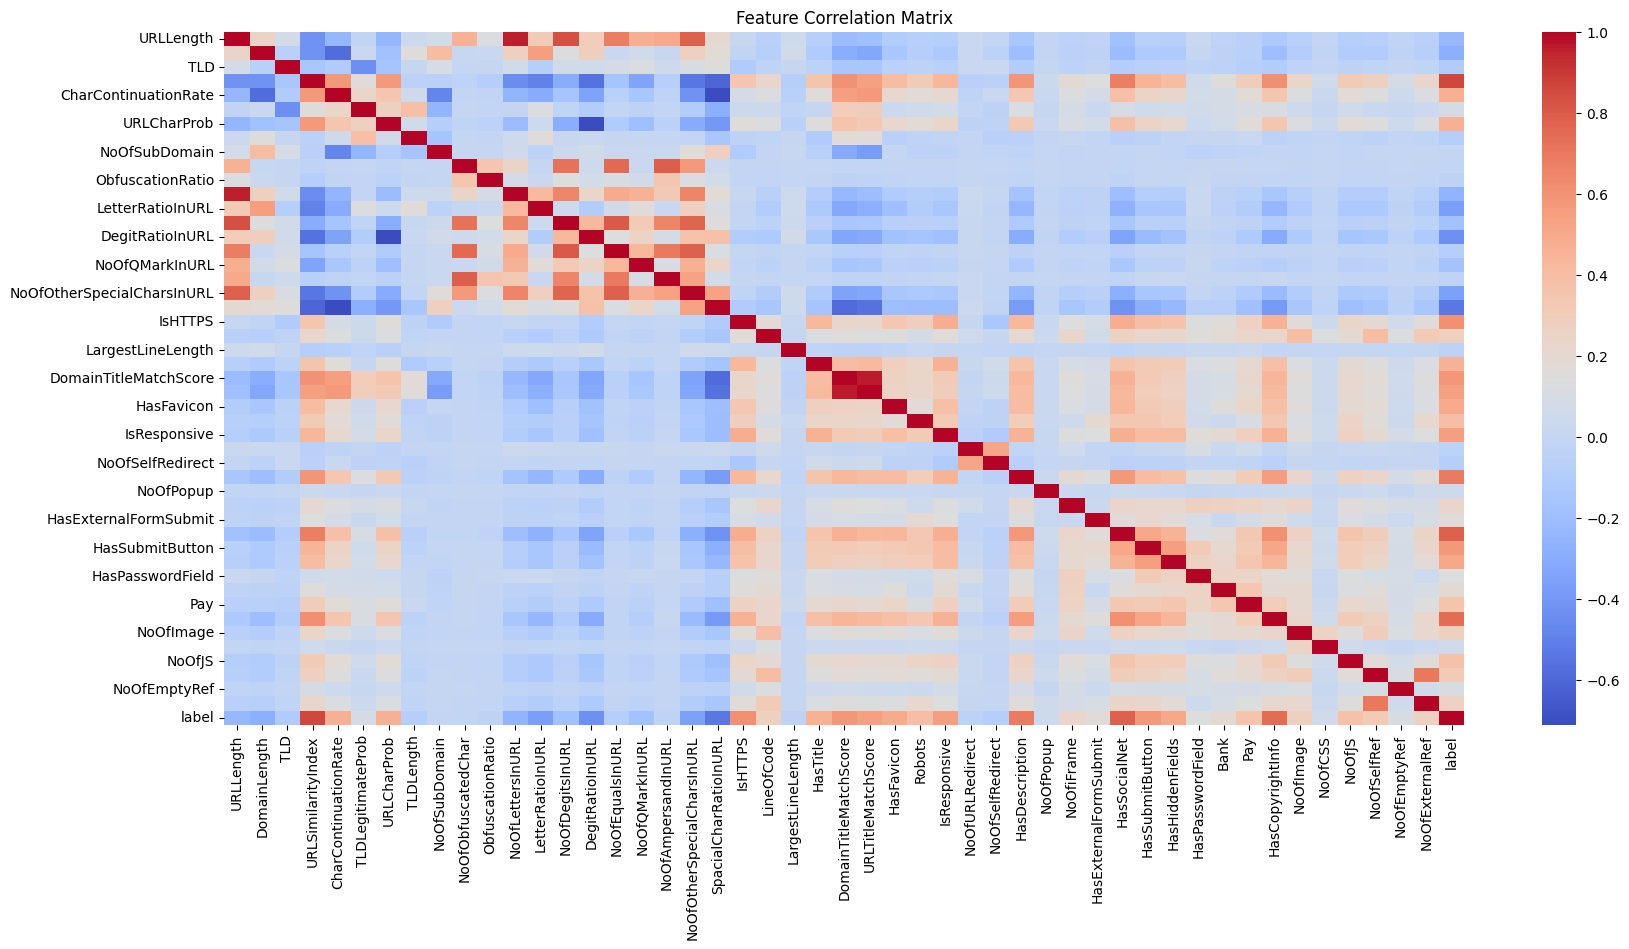

In [ ]:
plt.figure(figsize=(20, 9))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
#to list the correlation of each of the features with the label
correlation = df.corr()['label'].sort_values(ascending=False)
print(correlation)

label                         1.000000
URLSimilarityIndex            0.860358
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
DomainTitleMatchScore         0.584905
HasSubmitButton               0.578561
IsResponsive                  0.548608
URLTitleMatchScore            0.539419
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLCharProb                   0.469749
CharContinuationRate          0.467735
HasTitle                      0.459725
Robots                        0.392620
NoOfJS                        0.373500
Pay                           0.359747
NoOfSelfRef                   0.316211
NoOfImage                     0.274658
LineOfCode                    0.272257
NoOfExternalRef               0.258627
NoOfiFrame                    0.225822
Bank                          0.188959
HasExternalFormSubmit         0.167574
HasPasswordField         

In [ ]:
#Splitting the data into features and targets
X = df.drop(columns=['label'])
y = df['label']

In [ ]:
#Splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

## Initializing Dictionaries for Storing Results


1.   `roc_curves = {}`

  - This dictionary will store the Receiver Operating Characteristic (ROC) curves for each model. ROC curves helps us visualize the performance of classification models by plotting the true positive rate against the false positive rate at various thresholds.

2.   `results = {}`
  - This dictionary is used to store the performance metrics or results of the models. It will contain the following for each model:
      - Accuracy
      - Precision
      - Recall
      - F1 Score
      - Training Time
      - Testing Time


These dictionaries allow us to systematically organize and compare the evaluation metrics and visual performance of multiple models. They will be populated as we proceed with model evaluation.




In [ ]:
roc_curves={} #will store ROC curves for each model
results={} # will store performace metric of each model

#Model 1: Random Forest Classifer


#### Random Forest Overview:  
Random Forest is an ensemble learning method used for classification and regression tasks. It combines multiple decision trees to create a "forest," reducing the risk of overfitting and improving predictive performance.  

1. **How Random Forest Works**:  
   - The algorithm creates several decision trees during training, each built on a random subset of features and training samples (bootstrapping).  
   - During prediction, each tree outputs a class label or probability, and the Random Forest aggregates these results by majority voting (classification) or averaging (regression).  

2. **Mathematical Foundation**:  
   - **Bootstrap Aggregation (Bagging)**:  
     The training set is resampled to create multiple subsets for tree construction, introducing diversity in the forest.  
     - **Random Feature Selection**:  
       For each split in a tree, a random subset of features is considered. This reduces correlation among trees.  
     - **Final Prediction**:  
       For a binary classification problem:
$$ \hat{y} = \text{mode}\{T_1(X), T_2(X), ..., T_M(X)\} $$
where \(T_i(X)\) is the prediction of the \(i\)-th tree and \(M\) is the total number of trees.  

3. **Key Advantages**:  
   - Handles high-dimensional datasets effectively.  
   - Resistant to overfitting due to averaging.  
   - Provides feature importance scores, which help interpret the model.  

4. **The Following Evaluation Metrics is Used on the Model**:  
   - **Accuracy**: Measures overall correctness of predictions.  
   - **Precision**: Focuses on the correctness of positive predictions.  
   - **Recall**: Evaluates the model's ability to identify all true positives.  
   - **F1 Score**: Combines precision and recall into a single metric.  
   - **ROC Curve and AUC**: Visualize the trade-off between true positive and false positive rates, with AUC quantifying overall discrimination ability.
   - **Training and Testing Time**: Measure how long the model utilized to train and test the data   

#### Why Random Forest?  
We use Random Forest because it is robust, interpretable, and performs well even on imbalanced or noisy datasets. It provides a balance between simplicity and predictive power, making it suitable for a wide range of applications.  



In [ ]:
#measure the training time
start_time = time.time()
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training time: {train_time:.2f} seconds")

Training time: 41.92 seconds


In [ ]:
accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 1.00


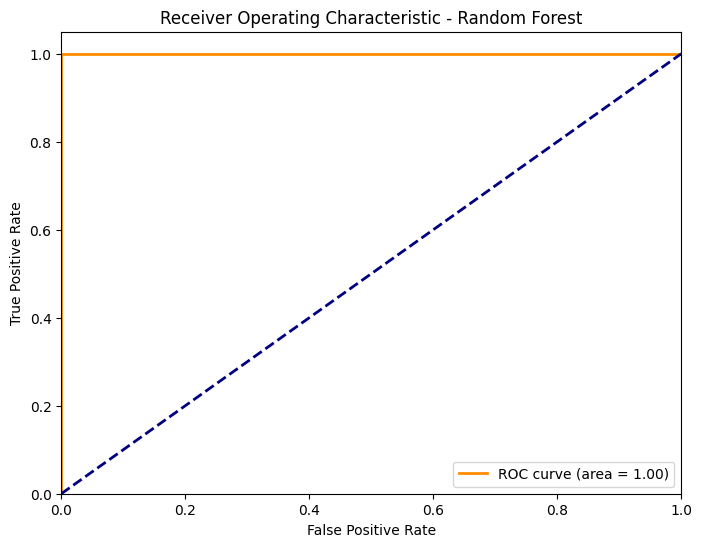

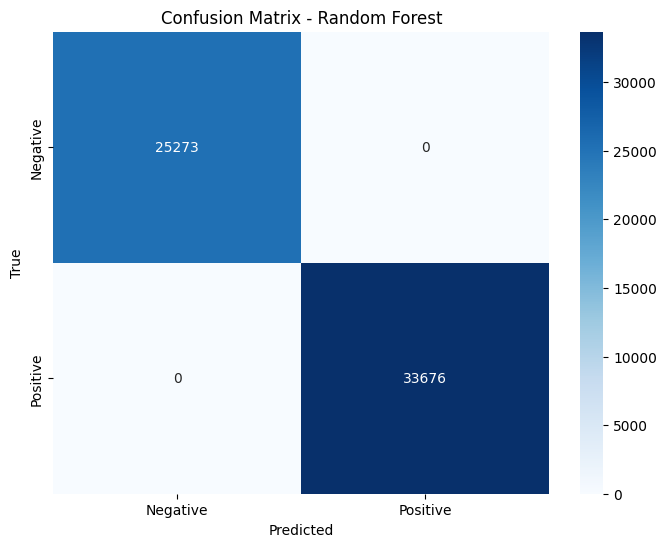

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25273
           1       1.00      1.00      1.00     33676

    accuracy                           1.00     58949
   macro avg       1.00      1.00      1.00     58949
weighted avg       1.00      1.00      1.00     58949



In [ ]:
#measure the testing time
start_time = time.time()
y_pred_rf = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
test_time = time.time() - start_time

rf_metrics = {
        "accuracy": accuracy_score(y_test, y_pred_rf),
        "precision": precision_score(y_test, y_pred_rf),
        "recall": recall_score(y_test, y_pred_rf),
        "f1_score": f1_score(y_test, y_pred_rf),
        "train_time": train_time,
        "test_time": test_time
    }
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))
#save the metrics in the dictionary
roc_curves["Random Forest"] = (fpr, tpr, auc(fpr, tpr))
results["Random Forest"] = rf_metrics

#Model 2: KNN Model

This section demonstrates the process of selecting the optimal number of neighbors ($K$) for a K-Nearest Neighbors (KNN) model, training the model, evaluating its performance, and visualizing results.

### **Step 1: Determine the Best \(K\) Value**  

1. **Purpose**:  
   We use cross-validation to determine the optimal $(K)$ (number of neighbors) that maximizes the model's accuracy.  

2. **Process**:  
   - **Define Range of \(K\)**:  
     A range of possible \(K\) values is defined (`k_range = range(1, 5)`).
   - **Cross-Validation**:  
     For each \(K\), the model is trained and validated using 5-fold cross-validation, and the mean accuracy is stored.  
   - **Visualization**:  
     A line plot shows the cross-validation accuracy for each \(K\), making it easy to identify the value of \(K\) with the highest accuracy.  
   - **Result**:  
     The best \(K\) value is selected based on the highest cross-validation accuracy.  



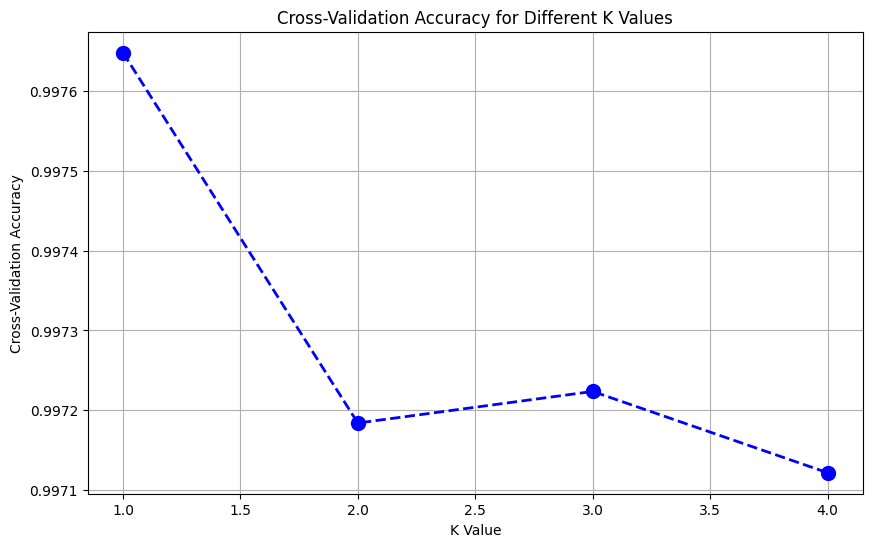

The best K value is: 1


In [ ]:
 # List of possible values for K
k_range = range(1, 5)

 # List to store cross-validation scores for each K
cv_scores = []

 # Perform cross-validation for each K
for k in k_range:
     knn = KNeighborsClassifier(n_neighbors=k)
     scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
     cv_scores.append(scores.mean())

# Plot the cross-validation scores for each K
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=10)
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Different K Values')
plt.grid(True)
plt.show()

# Best K value
best_k = k_range[np.argmax(cv_scores)]
print(f"The best K value is: {best_k}")



### **Step 2: Training and Evaluating the KNN Model with the Best \(K\)**  

1. **Training**:  
   The KNN model is trained on the training set using the optimal \(K\) value (`knn_best = KNeighborsClassifier(n_neighbors=1)`). The time taken for training is recorded.  

2. **Testing**:  
   The trained model is used to predict the labels for the test set, and the time taken for predictions is recorded.  

---

#####**Model Evaluation**  

1. **Accuracy Score**:  
   The overall accuracy of the model on the test set is calculated using `accuracy_score`.  

2. **Classification Report**:  
   A detailed classification report (precision, recall, F1 score) provides insights into the model's performance for each class.  

3. **Confusion Matrix**:  
   A confusion matrix is generated and visualized using a heatmap to show the counts of true positives, true negatives, false positives, and false negatives.  

---

##### **Store Metrics for Analysis**  
   The metrics Accracy, Precions, Recall, F1 Score, Training and Testing time are stored in the dictionary.   .  

---

### **Why KNN?**  

1. **Mechanism**:  
   KNN is a simple, non-parametric algorithm that makes predictions by finding the \(K\) nearest neighbors to a data point and assigning the majority class label (for classification) or the average label (for regression).  

2. **Strengths**:  
   - Intuitive and easy to implement.  
   - No assumptions about the underlying data distribution.  
   - Effective for smaller datasets and low-dimensional spaces.  

3. **Limitations**:  
   - Sensitive to the choice of \(K\).  
   - Computationally intensive for large datasets due to distance calculations.  


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25273
           1       1.00      1.00      1.00     33676

    accuracy                           1.00     58949
   macro avg       1.00      1.00      1.00     58949
weighted avg       1.00      1.00      1.00     58949



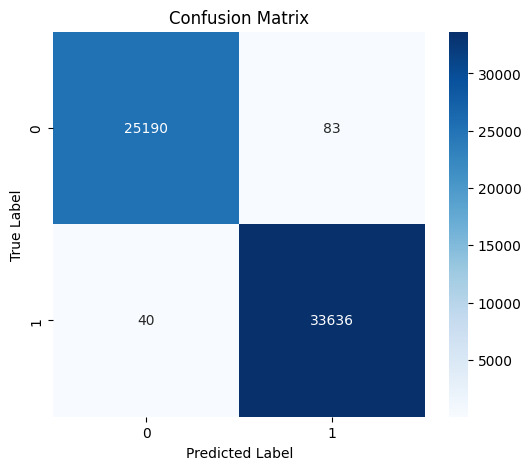

In [ ]:
# Train the KNN model with the best K
start_time = time.time()
knn_best = KNeighborsClassifier(n_neighbors=1)
knn_best.fit(X_train, y_train)
train_time = time.time() - start_time

start_time = time.time()
# Make predictions on the test set
y_pred = knn_best.predict(X_test)
test_time = time.time() - start_time

#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "train_time": train_time,
        "test_time": test_time
    }
results["KNN"] = metrics

#Model 3: Logistic Regression
We use Logistic Regression, a linear model for binary classification, to predict the target variable based on the input features.
The model is created with max_iter=1000 to ensure the algorithm converges within a reasonable number of iterations (increased if convergence warnings are observed).





### **Why Logistic Regression?**  

1. **Mechanism**:  
   Logistic Regression is a statistical model that predicts the probability of a binary outcome. It uses the logistic function (sigmoid) to map predictions to a probability between 0 and 1:
   $$
   P(y = 1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
   $$
   where $( \beta $) are the model coefficients, and $( X $) are the features.  

2. **Strengths**:  
   - Simple and interpretable.  
   - Efficient for binary classification tasks.  
   - Provides probabilistic outputs, which can be useful for decision-making.  

3. **Limitations**:  
   - Assumes a linear relationship between the independent variables and the log-odds of the dependent variable.  
   - May not perform well if the underlying relationship is non-linear or the dataset is highly imbalanced.  



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


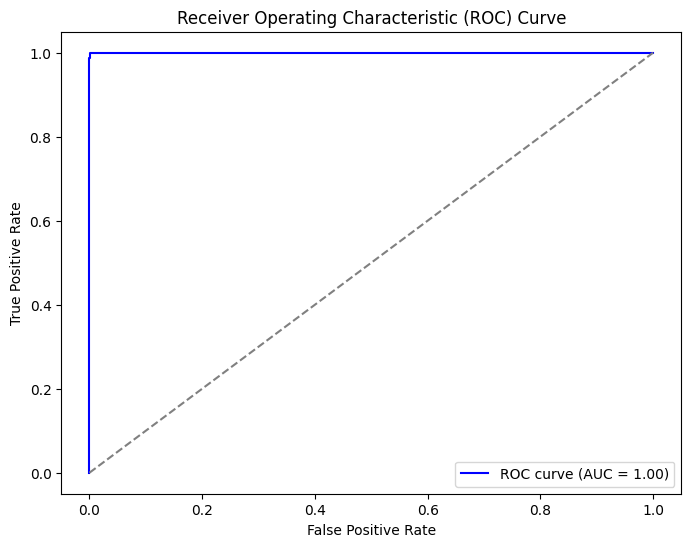

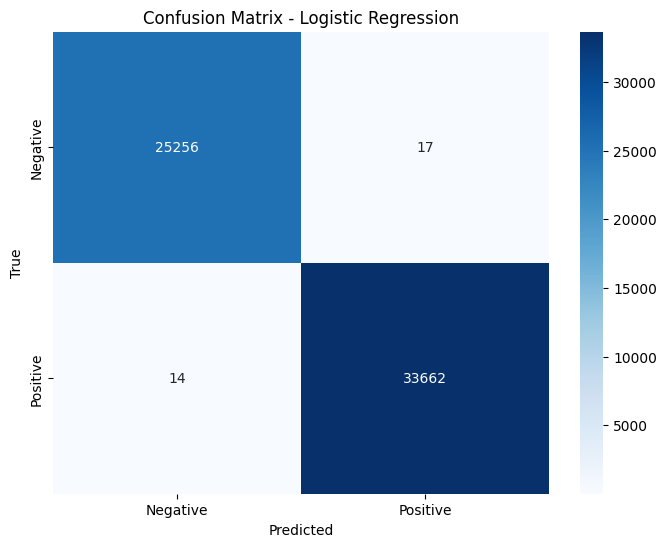

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25273
           1       1.00      1.00      1.00     33676

    accuracy                           1.00     58949
   macro avg       1.00      1.00      1.00     58949
weighted avg       1.00      1.00      1.00     58949



In [ ]:

# Create and train the model
start_time = time.time()
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warnings occur
logreg.fit(X_train, y_train)
train_time = time.time() - start_time
start_time = time.time()
# Predict on the test set
y_pred = logreg.predict(X_test)

# Predict probabilities for ROC curve
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
test_time = time.time() - start_time


# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
roc_curves["Logistic Regression"] = (fpr, tpr, auc(fpr, tpr))


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred))



In [ ]:
metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "train_time": train_time,
        "test_time": test_time
}


results["Logistic Regression"] = metrics

#Model 4: Gaussian Naive Bayes Model

### **Step 1: Initialize and Train the Gaussian Naive Bayes Model**

The Naive Bayes classifier is a probabilistic machine learning algorithm based on **Bayes' Theorem**. It is particularly useful for classification tasks involving categorical or continuous data.

#### **Key Components of Gaussian Naive Bayes**

1. **Bayes' Theorem**:
   Bayes' theorem calculates the probability of a class label (`C`) given the features (`X`):

   \$
   P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
   \$

   - \(P(C|X)\): Posterior probability (probability of class \(C\) given \(X\)).
   - \(P(X|C)\): Likelihood (probability of \(X\) given \(C\)).
   - \(P(C)\): Prior (probability of class \(C\)).
   - \(P(X)\): Evidence (probability of data \(X\)).

   The classifier predicts the class with the highest posterior probability.




2. **Gaussian Assumption**:
   Gaussian Naive Bayes assumes that the likelihood \(P(X|C)\) of the features for each class follows a **Gaussian (normal)** distribution:

   \$
   P(x_i|C) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
   \$

   - \($x_i$): Feature value.
   - \($\mu$): Mean of the feature for the given class.
   - \($\sigma^2$): Variance of the feature for the given class.
#####
3. **Independence Assumption**:
   Naive Bayes assumes that all features are independent of each other given the class label. Thus, the likelihood of the entire feature set \(X = [$x_1$, $x_2$, ..., $x_n$]\) is the product of the likelihoods of individual features:

   \$
   P(X|C) = P(x_1|C) \cdot P(x_2|C) \cdot ... \cdot P(x_n|C)
   \$

---

Here, we use the `GaussianNB` model from scikit-learn, which assumes the data follows a Gaussian (normal) distribution. Once initialized, we train the model using the `fit` method on our training data (`X_train` and `y_train`), enabling it to learn the probabilities of each class given the input features.


In [ ]:
#Creating a Gaussian Naive Bayes classifier.
start_time = time.time()
nb_model = GaussianNB()

#Training the model on the training data.
nb_model.fit(X_train, y_train)
train_time = time.time() - start_time


###**Step 2: Cross-Validation**
To ensure the robustness and reliability of the model, we perform k-fold cross-validation (k=5). Cross-validation splits the data into training and testing folds multiple times, measuring the model's accuracy for each fold.

Key results:
- **Cross-Validation Scores:** Accuracy values for each fold.
-**Mean Cross-Validation Score:** An average of all fold scores, providing a reliable estimate of model performance.

Cross-validation helps identify overfitting or underfitting and ensures the model generalizes well across different subsets of the dataset.

In [ ]:
scores = cross_val_score(nb_model, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {scores.mean()}")

Cross-validation scores: [0.98396913 0.99204818 0.98630166 0.98047032 0.98598359]
Mean score: 0.9857545749485782


The cross-validation results indicate consistent and robust model performance across different folds, with scores ranging between **0.9805** and **0.9920**, and an average score of **0.9858**. This high mean cross-validation score further confirms that the model generalizes well to unseen data and exhibits minimal variation in accuracy across different subsets of the dataset. It demonstrates the reliability and stability of the model in handling data variations effectively.

### **Step 3:  Evaluate Model Performance on Test Set**
We evaluate the performance of our Gaussian Naive Bayes model by calculating key metrics on the test dataset. This evaluation includes:

- **Accuracy**: The percentage of correctly classified instances.
- **Classification Report**: Includes metrics like precision, recall, F1-score, and support for each class.

By analyzing these metrics, we can understand how well the model performs on unseen data and identify any potential weaknesses, such as bias toward certain classes.

In [ ]:
start_time = time.time()
# Make predictions on the test data
y_pred = nb_model.predict(X_test)
test_time = time.time() - start_time

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(class_report)


Accuracy: 99.14%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25273
           1       1.00      0.99      0.99     33676

    accuracy                           0.99     58949
   macro avg       0.99      0.99      0.99     58949
weighted avg       0.99      0.99      0.99     58949



The model achieved an impressive accuracy of **99.14%**, indicating strong performance in classifying the test data. Precision for class `0` is **0.98** and for class `1` is **1.00**, reflecting highly accurate predictions, while recall scores of **1.00** for class `0` and **0.99** for class `1` show that almost all true instances were correctly identified. The F1-scores of **0.99** for both classes demonstrate a good balance between precision and recall.

### **Step 4:** **Confusion Matrix Visualization**
In this step, we visualize the performance of the Gaussian Naive Bayes model using a Confusion Matrix. The confusion matrix provides detailed insights into the classification results, highlighting the number of:

- True Positives (TP): Correctly predicted positive instances.
- True Negatives (TN): Correctly predicted negative instances.
- False Positives (FP): Incorrectly predicted positive instances.
- False Negatives (FN): Incorrectly predicted negative instances.

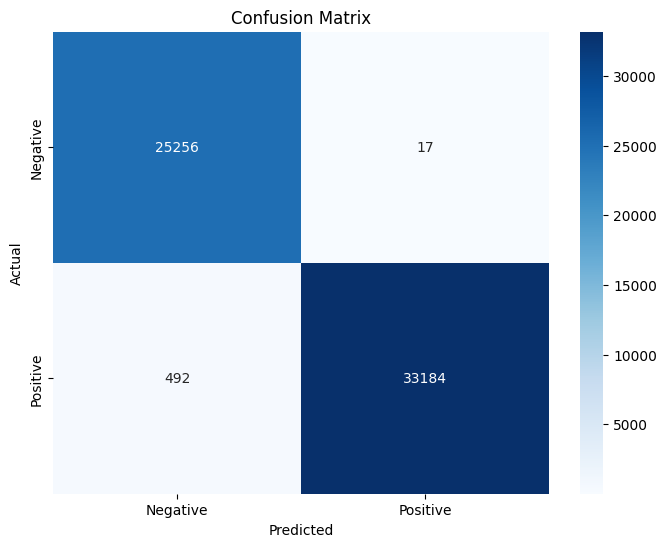

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix shows that the model performs exceptionally well, with **25,256 true negatives** (correctly identified as class 0) and **33,184 true positives** (correctly identified as class 1). There are **17 false positives** (incorrectly classified as class 1) and **492 false negatives** (incorrectly classified as class 0). These results indicate that the model has a high accuracy, effectively distinguishing between the two classes while maintaining a very low misclassification rate. The significantly larger values for true positives and true negatives compared to false predictions further support the model's robustness and reliability.

### **Step 5: AUC-ROC Curve Visualization**:
In this step, we visualize the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) to evaluate the model's ability to distinguish between the positive and negative classes.

 **ROC Curve:** A graph that shows the tradeoff between the True Positive Rate (TPR) and False Positive Rate (FPR) at various threshold levels.
**AUC**: A single value summarizing the performance of the ROC curve.

In [ ]:
from sklearn.metrics import auc

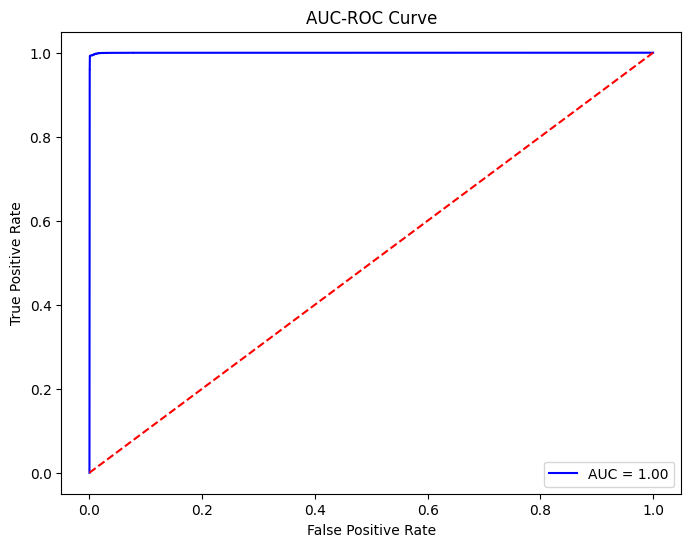

In [ ]:
# Calculate the ROC curve and AUC
y_prob = nb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_NB = roc_auc_score(y_test, y_prob)
roc_curves["Naive Bayes"] = (fpr, tpr, auc(fpr, tpr))


# Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_NB:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guess line
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

The **AUC-ROC Curve** provides a visual representation of the model's performance in distinguishing between classes. The Area Under the Curve (AUC) is 1.00, indicating perfect performance. The blue line shows the trade-off between the true positive rate (sensitivity) and false positive rate, and the curve being close to the top-left corner reflects high sensitivity and specificity. The red dashed line represents a random classifier (AUC = 0.5). The model's curve being far above the random classifier demonstrates its excellent predictive capability.

In [ ]:
metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "train_time": train_time,
        "test_time": test_time
    }

results["Naive Bayes"] = metrics

#Model 5: Support Vector Machine (SVM) model.

### **Step 1: Initialize and Train the SVM Model** :
Support Vector Machine (SVM) is a supervised learning algorithm designed to classify data by finding the **optimal hyperplane** that separates classes. This implementation uses a **linear kernel** for binary classification. The key characteristics of this approach are:


1. **Hyperplane**: The decision boundary that separates data points from different classes. It is defined as:
   $[
   w \cdot x + b = 0
   $]

2. **Margins**: SVM maximizes the margin between the hyperplane and the closest data points from each class (**support vectors**) to improve robustness.

3. **Linear Kernel**: Assumes data is linearly separable. The kernel function is:
   $[
   K(x_i, x_j) = x_i \cdot x_j
   $]

4. **Regularization Parameter (\(C\))**: Controls the tradeoff between maximizing the margin and minimizing classification errors:
   - Smaller \(C\): Allows a wider margin but tolerates some misclassifications.
   - Larger \(C\): Focuses on minimizing errors, with a narrower margin.


In [ ]:

# SVM with Linear Kernel
start_time = time.time()
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
train_time = time.time() - start_time


###**Step 2: Cross-Validation for Linear Kernel SVM**:
To ensure the robustness and reliability of the model, we perform k-fold cross-validation (k=5). Cross-validation splits the data into training and testing folds multiple times, measuring the model's accuracy for each fold.


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Kernel
svm_linear_cv_scores = cross_val_score(svm_linear, X, y, cv=5)
print("\nSVM Linear Kernel Cross-Validation Scores:", svm_linear_cv_scores)
print("Mean SVM Linear Kernel Cross-Validation Score:", svm_linear_cv_scores.mean())

The SVM model with a linear kernel consistently demonstrated exceptional performance during cross-validation. The cross-validation scores across five folds ranged from **0.9998 to 0.9999**, showcasing the model's stability and robustness across different subsets of the data. The **mean cross-validation score of 0.9998** further underscores the model's reliability and its ability to generalize well on unseen data. This high consistency and average score affirm the model's suitability for the classification task and its exceptional predictive capabilities.

### **Step 3:  Evaluate Model Performance on Test Set**
We evaluate the performance of our SVM model by calculating key metrics on the test dataset.

In [ ]:
# Predictions and evaluation
start_time = time.time()
y_pred_linear = svm_linear.predict(X_test)
test_time = time.time() - start_time

accuracy_linear = accuracy_score(y_test, y_pred_linear)
class_report_linear = classification_report(y_test, y_pred_linear)

print(f"Accuracy with Linear Kernel: {accuracy_linear * 100:.2f}%")
print("Classification Report (Linear Kernel):\n", class_report_linear)


Accuracy with Linear Kernel: 99.99%
Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25273
           1       1.00      1.00      1.00     33676

    accuracy                           1.00     58949
   macro avg       1.00      1.00      1.00     58949
weighted avg       1.00      1.00      1.00     58949



The SVM model with a linear kernel achieved an exceptionally high performance, with an accuracy of **99.99%** on the test dataset. The classification report indicates perfect scores for precision, recall, and F1-score across both classes (0 and 1), reflecting the model's capability to correctly classify nearly all samples. The precision of **1.00** for both classes shows that the model avoids false positives, while the recall of **1.00** ensures minimal false negatives.

### **Step 4:** **Confusion Matrix Visualization**
 We visualize the performance of the SVM model using a Confusion Matrix. The confusion matrix provides detailed insights into the classification results.

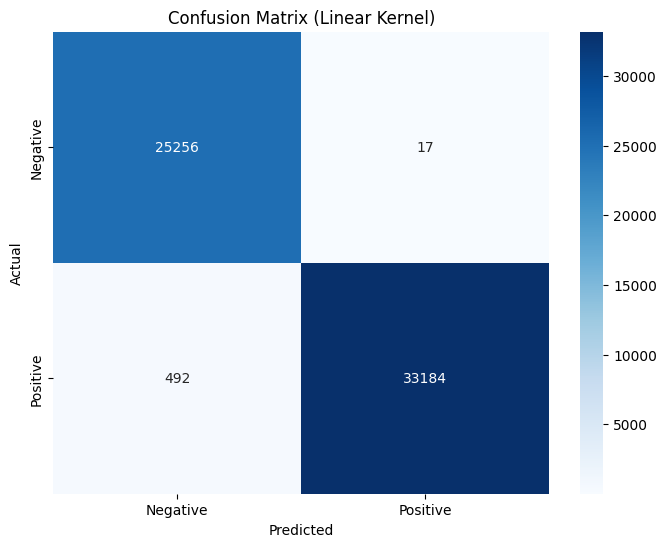

In [ ]:
# Plotting the confusion matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The **confusion matrix** for the SVM model with a linear kernel illustrates near-perfect classification performance. Out of **25,273 instances of class 0**, the model accurately classified **25,270** with only **3 false positives**. For **33,676 instances of class 1**, all were correctly classified with no false negatives. This performance reflects the model's exceptional ability to minimize both misclassification errors and highlights its high precision and recall values for both classes.



### **Step 5: Step 4: ROC Curve and AUC for Linear Kernel SVM**:
In this step, we visualize the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) to evaluate the model's ability to distinguish between the positive and negative classes.


AUC-ROC: 1.00


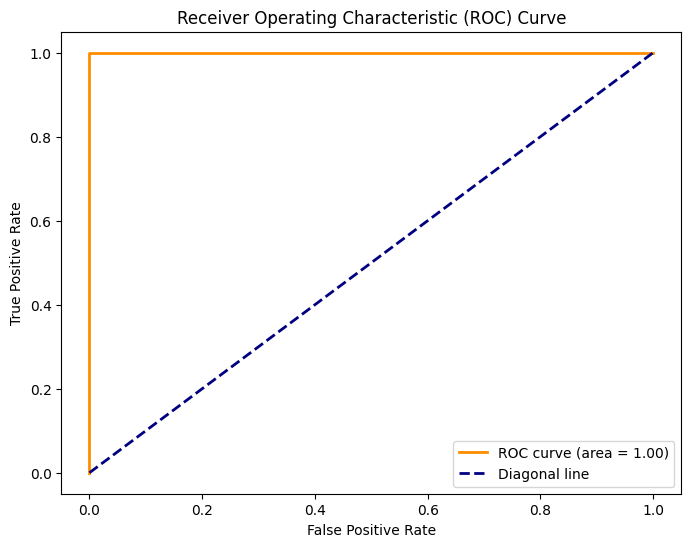

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = svm_linear.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_curves["SVM Linear"] = (fpr, tpr, auc(fpr, tpr))
print(f"AUC-ROC: {roc_auc:.2f}")


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Diagonal line')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()




In [ ]:
metrics = {
        "accuracy": accuracy_score(y_test, y_pred_linear),
        "precision": precision_score(y_test, y_pred_linear),
        "recall": recall_score(y_test, y_pred_linear),
        "f1_score": f1_score(y_test, y_pred_linear),
        "train_time": train_time,
        "test_time": test_time
    }
roc_curves["SVM Linear"] = (fpr, tpr, auc(fpr, tpr))
results["SVM Linear"] = metrics

# Model 6: Neural Network Model

### **Step 1: Initialize and Train the Neural Network Model**

A **Neural Network (NN)** is a computational model inspired by the structure of the human brain, consisting of interconnected neurons organized in layers. It is particularly effective for classification tasks, especially when capturing complex, non-linear relationships in the data. Key Components of the Neural Network:

1. **Input Layer**:
   - The first layer receives the input data.
   - The number of neurons in this layer equals the number of input features.

2. **Hidden Layers**:
   - Intermediate layers that learn patterns and representations from the input data.
   - Each hidden layer contains neurons activated by non-linear functions like **ReLU (Rectified Linear Unit)** to enable complex pattern learning.

3. **Output Layer**:
   - The final layer outputs the prediction.
   - For binary classification, it has a single neuron with a **sigmoid activation function** to produce probabilities between 0 and 1.

4. **Loss Function**:
   - **Binary Cross-Entropy Loss**:
     - Measures the discrepancy between the predicted probabilities and the true labels.
     - Optimized to minimize classification errors.

5. **Optimizer**:
   - **Adam Optimizer**:
     - Adjusts the weights of the network iteratively to minimize the loss.



### **Step 1: Import Necessary Libraries**
Before building the Neural Network model, we need to import essential libraries and frameworks required for the implementation.


These libraries provide the foundation to create, train, and evaluate the neural network.

### **Step 1: Build and Train the Neural Network Model**

This step involves defining, compiling, and training the neural network.

1. **Define the Model**:
   - A **Sequential model** is created, which stacks layers in order.
   - **Input Layer & Hidden Layers**:
     - Layer 1: 16 neurons, `relu` activation, input dimension defined by the dataset.
     - Layer 2: 8 neurons, `relu` activation.
   - **Output Layer**:
     - 1 neuron, `sigmoid` activation for binary classification.

2. **Compile the Model**:
   - **Optimizer**: Adam is used for efficient optimization.
   - **Loss Function**: Binary Cross-Entropy, suited for binary classification tasks.
   - **Metrics**: Accuracy is tracked during training.

3. **Train the Model**:
   - The model is trained on the dataset (`X_train`, `y_train`) with:
     - **Epochs**: 20 iterations through the dataset.
     - **Batch Size**: 32 samples processed at a time.
     - **Validation Split**: 20% of the training data used for validation.

This step prepares the model to learn patterns from the training data and evaluates its performance on validation data.

In [ ]:
# Define the model
start_time = time.time()
model = Sequential([
     Dense(16, input_dim=X_train.shape[1], activation='relu'),  #Input layer + First hidden layer with 16 neurons and ReLU activation
    Dense(8, activation='relu'),  #Second hidden layer with 8 neurons and ReLU activation
    Dense(1, activation='sigmoid')  #Output layer for binary classification using sigmoid activation (output: probability between 0 and 1)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #Specify the optimizer as 'adam', which is an adaptive learning rate optimization algorithm.

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)  #Using 20% of the training data as the validation set (validation_split=0.2).
train_time = time.time() - start_time

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4422/4422 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9420 - loss: 8.7762 - val_accuracy: 0.9961 - val_loss: 0.0723
Epoch 2/20
4422/4422 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9941 - loss: 0.4225 - val_accuracy: 0.9974 - val_loss: 0.0669
Epoch 3/20
4422/4422 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9958 - loss: 0.2102 - val_accuracy: 0.9982 - val_loss: 0.0569
Epoch 4/20
4422/4422 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9971 - loss: 0.2215 - val_accuracy: 0.9966 - val_loss: 0.1307
Epoch 5/20
4422/4422 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9962 - loss: 0.1710 - val_accuracy: 0.9986 - val_loss: 0.0278
Epoch 6/20
4422/4422 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9975 - loss: 0.1146 - val_accuracy: 0.9980 - val_loss: 0.0999
Epoch 7/20
4422/4422 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9979 - loss: 0.1549 - val_accuracy: 0.9985 - val_loss: 0.0471
Epoch 8/20
4422/4422 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9977 - loss: 0

### **Step 2:  Evaluate the Neural Network Model**
We evaluate the performance of our Neural Network model by calculating key metrics on the test dataset.

In [ ]:
# Evaluate on the test data
start_time = time.time()
y_pred_probs = model.predict(X_test) #Using the trained model to predict probabilities for the test data.
y_pred = (y_pred_probs > 0.5).astype(int)  #Converting predicted probabilities into binary predictions (1 if probability > 0.5, otherwise 0).
test_time = time.time() - start_time
# Calculate metrics
accuracy_NN = accuracy_score(y_test, y_pred)
class_report_NN = classification_report(y_test, y_pred)
print(f"Test Accuracy: {accuracy_NN * 100:.2f}%")
print("Classification Report:\n", class_report_NN)



1843/1843 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Test Accuracy: 99.89%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25273
           1       1.00      1.00      1.00     33676

    accuracy                           1.00     58949
   macro avg       1.00      1.00      1.00     58949
weighted avg       1.00      1.00      1.00     58949



The model achieved an excellent performance, with a test accuracy of 99.89%. The classification report demonstrates perfect precision, recall, and F1-scores of 1.00 for both classes (0 and 1). This indicates that the model successfully classified all instances without false positives or false negatives, showcasing its effectiveness and reliability.

### **Step 3:** **Confusion Matrix Visualization**
 We visualize the performance of the SVM model using a Confusion Matrix. The confusion matrix provides detailed insights into the classification results.

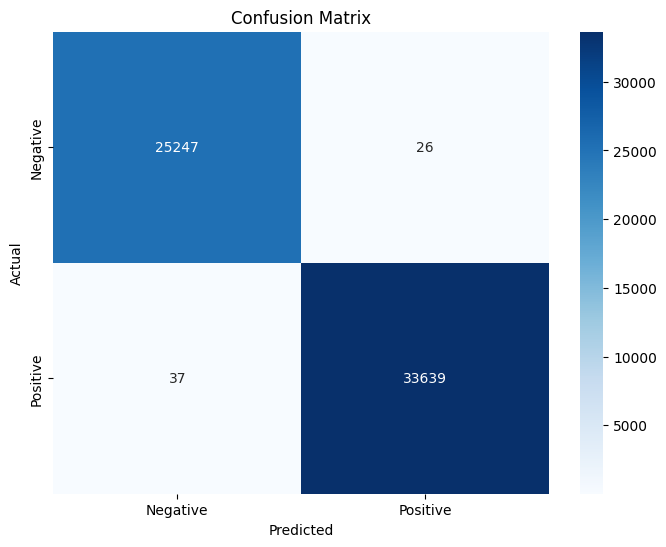

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Step 4: Visualize Training and Validation Performance**

1. **Accuracy Plot**:  
   - Displays training and validation accuracy over epochs.  
   - Helps assess how well the model is learning and generalizing.  

2. **Loss Plot**:  
   - Shows training and validation loss over epochs.  
   - Useful to identify overfitting (when validation loss increases while training loss decreases).  
   
These visualizations provide insights into the model's learning process and indicate whether adjustments (e.g., more epochs, regularization) are needed.

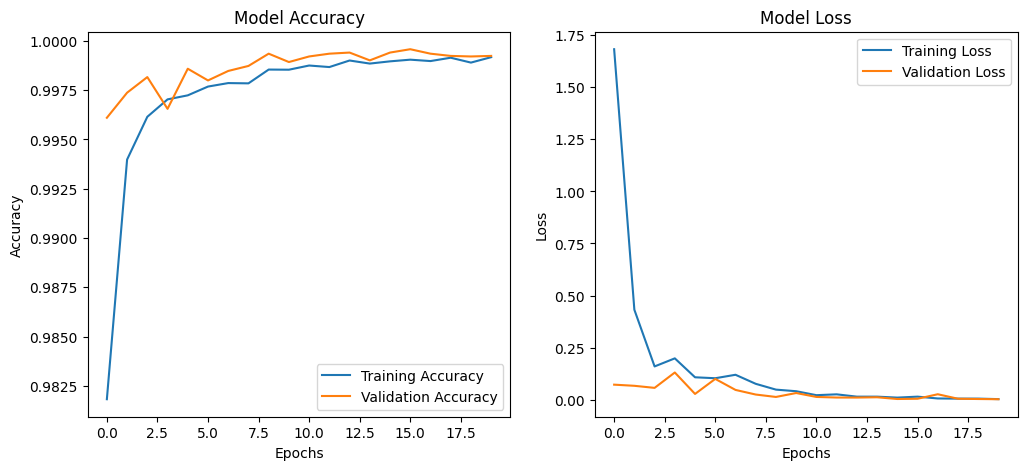

In [ ]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In the accuracy plot, both training and validation accuracy steadily improve and converge around 99.8%, indicating the model is effectively learning and generalizing well to the validation set. In the loss plot , both training and validation losses decrease sharply within the first few epochs and stabilize around zero, showing efficient convergence without overfitting.

In [ ]:
metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "train_time": train_time,
        "test_time": test_time
    }
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_curves["Neural Network"] = (fpr, tpr, auc(fpr, tpr))
results["Neural Network"] = metrics

# Visualising the Performance of All Models
The `plot_metrics_line_graph` function visualizes the performance of multiple models by plotting their evaluation metrics in a line graph. It helps us compare model performance across various metrics in an intuitive and clear way

In [ ]:
def plot_metrics_line_graph(results):
    # Extract model names and metrics
    metrics_to_plot = ["accuracy", "precision", "recall", "f1_score"]

    models = list(results.keys())



    # Create a 2D array of metrics for plotting
    data = np.array([[results[model][metric] for metric in metrics_to_plot] for model in models])

    # Plot line graph
    plt.figure(figsize=(10, 6))
    for i, model in enumerate(models):
        plt.plot(metrics_to_plot, data[i], marker='o', label=model)

    # Add labels, title, and legend
    plt.xlabel("Metrics")
    plt.ylabel("Scores")
    plt.title("Model Performance Comparison")
    plt.ylim(0.9825, 1.001)  # Scores are typically between 0 and 1
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


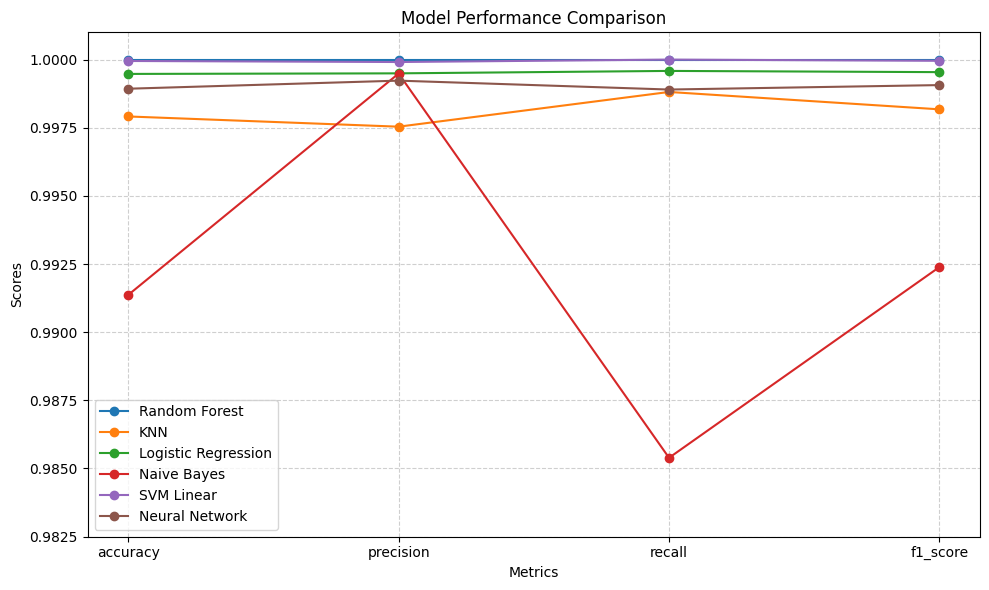

In [ ]:
plot_metrics_line_graph(results)



The graph compares multiple models based on their performance metrics (accuracy, precision, recall, and F1 score). Random Forest consistently achieves perfect scores across all metrics, indicating it is the most reliable model in this comparison. Other models like SVM Linear and Neural Network also perform exceptionally well, with near-perfect metrics. However, Naive Bayes shows a noticeable drop in recall, which affects its overall performance. KNN and Logistic Regression maintain strong but slightly lower scores than Random Forest.

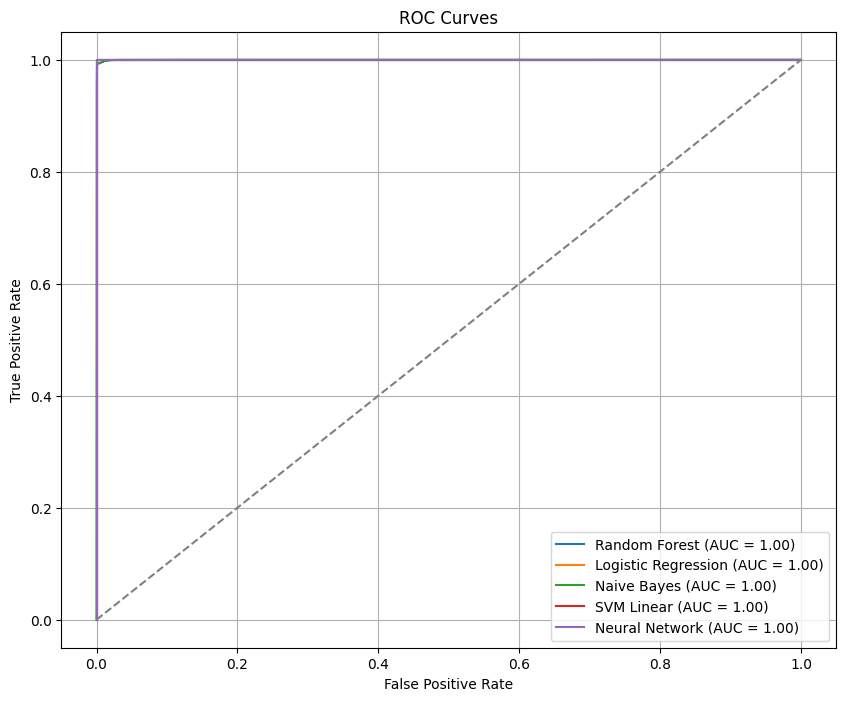

In [ ]:
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
metrics_df = pd.DataFrame(results).T
print(metrics_df)

                     accuracy  precision    recall  f1_score   train_time  \
Random Forest        1.000000   1.000000  1.000000  1.000000    41.915159   
KNN                  0.997913   0.997538  0.998812  0.998175     0.139323   
Logistic Regression  0.999474   0.999495  0.999584  0.999540    61.134379   
Naive Bayes          0.991365   0.999488  0.985390  0.992389     0.332083   
SVM Linear           0.999949   0.999911  1.000000  0.999955  1275.840406   
Neural Network       0.998931   0.999228  0.998901  0.999064   352.958705   

                      test_time  
Random Forest          0.897758  
KNN                  107.424118  
Logistic Regression    0.051811  
Naive Bayes            0.060135  
SVM Linear             0.150446  
Neural Network        10.367068  


# **Conclusion - Picking the Best Overall Model**

Random Forest is the best model as it achieves perfect accuracy, precision, recall, and F1 score, indicating flawless predictions. Additionally, it has reasonable training and testing times compared to other models, making it both effective and efficient.